<a href="https://colab.research.google.com/github/vishoTheEver/ethinicity-recognition-UTKfaces/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task #1: Baseline

In [13]:
# imports
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from sklearn.metrics import classification_report
import numpy as np
import tqdm

In [2]:
unique_labels = ['White', 'Black', 'Asian', 'Indian']

In [3]:
class ResNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.resnet = models.resnet18(weights=None)
    num_features = self.resnet.fc.in_features
    self.resnet.fc = nn.Linear(num_features, len(unique_labels))

  def forward(self, x):
    return self.resnet(x)

In [5]:
net = ResNet()
lr = 0.001
nb_epochs = 30
batch_size = 32
seed = 777
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr)

In [6]:
!unzip data.zip -d ./data

Streaming output truncated to the last 5000 lines.
  inflating: ./data/utk_race_cc1_seed777/val/0/4_1_0_20170109193813519.jpg.chip.jpg  
  inflating: ./data/__MACOSX/utk_race_cc1_seed777/val/0/._4_1_0_20170109193813519.jpg.chip.jpg  
  inflating: ./data/utk_race_cc1_seed777/val/0/10_0_0_20170110225502403.jpg.chip.jpg  
  inflating: ./data/__MACOSX/utk_race_cc1_seed777/val/0/._10_0_0_20170110225502403.jpg.chip.jpg  
  inflating: ./data/utk_race_cc1_seed777/val/0/26_0_0_20170117171702618.jpg.chip.jpg  
  inflating: ./data/__MACOSX/utk_race_cc1_seed777/val/0/._26_0_0_20170117171702618.jpg.chip.jpg  
  inflating: ./data/utk_race_cc1_seed777/val/0/6_1_0_20170109205251485.jpg.chip.jpg  
  inflating: ./data/__MACOSX/utk_race_cc1_seed777/val/0/._6_1_0_20170109205251485.jpg.chip.jpg  
  inflating: ./data/utk_race_cc1_seed777/val/0/28_0_0_20170116192500842.jpg.chip.jpg  
  inflating: ./data/__MACOSX/utk_race_cc1_seed777/val/0/._28_0_0_20170116192500842.jpg.chip.jpg  
  inflating: ./data/utk_race

In [16]:
# Define transformations
train_transform = transforms.Compose([
    transforms.Resize(size=128),
    transforms.RandomCrop(104),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3,[0.5]*3)
])
test_transform = transforms.Compose([
    transforms.Resize(size=128),
    transforms.CenterCrop(104),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3,[0.5]*3)
])

# Load the dataset and apply transformations
train_dataset = ImageFolder('data/utk_race_cc1_seed{}/train/'.format(seed), transform=train_transform)
val_dataset = ImageFolder('data/utk_race_cc1_seed{}/val/'.format(seed), transform=test_transform)
test_dataset = ImageFolder('data/utk_race_cc1_seed{}/test/'.format(seed), transform=test_transform)

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [17]:
# inverse normalization
inv_normalize = transforms.Compose([
    transforms.Normalize(
        mean = [0., 0. ,0.],
        std = [1/0.5, 1/0.5, 1/0.5]
    ),
    transforms.Normalize(
        mean = [-0.5, -0.5, -0.5],
        std = [1., 1., 1.]
    )
])

Label = Black


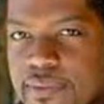

In [47]:
i = np.random.choice(len(train_dataset))
input_tensor = inv_normalize(train_dataset[i][0])
grid = torchvision.utils.make_grid(input_tensor, nrow=1)
print("Label =", unique_labels[train_dataset[i][1]])
transforms.ToPILImage()(grid)

# Task #2: Relationship between Learning Rate and Performance

# Task #3: Relationship between Batch Size and Performance

# Task #4: Best Model